We start by reading the files

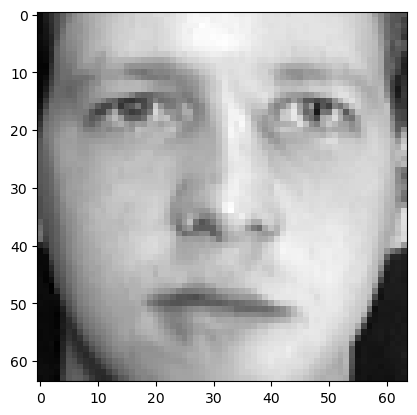

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

df = pd.read_csv('./data/face_data.csv')
A = df.iloc[:,:4096].to_numpy().transpose()

# display the 10th image in the data set
imag = A[:, 7].reshape((64,64))
plt.imshow(imag, cmap='gray')
plt.show()

# YOUR CODE GOES HERE 

Here we take the mean of each row of our data and subtract it to demean the data

In [3]:
#In this step we will de-mean the matrix
meanValue = np.mean(A,axis=1).reshape(A.shape[0],1)
A = A - meanValue
print(A.shape)

(4096, 400)


We prefrom an SVD reduction on our data

In [24]:
#SVD Decomposition
U,S,V = np.linalg.svd(A,full_matrices=False)
print(U.shape)
print(S)

(4096, 400)
[8.67019612e+01 6.64652768e+01 5.01551715e+01 3.97225256e+01
 3.37573845e+01 3.15687546e+01 2.76786063e+01 2.53545338e+01
 2.48624162e+01 2.29751466e+01 2.24406206e+01 2.12985248e+01
 1.98386660e+01 1.90296699e+01 1.83174879e+01 1.75683776e+01
 1.70332034e+01 1.60455949e+01 1.54267296e+01 1.53560746e+01
 1.48501800e+01 1.39293410e+01 1.35770019e+01 1.34108414e+01
 1.31309612e+01 1.29574961e+01 1.27358589e+01 1.25111052e+01
 1.20198139e+01 1.18014106e+01 1.12651838e+01 1.10127877e+01
 1.06892986e+01 1.02766109e+01 1.00567471e+01 9.98840093e+00
 9.81474719e+00 9.70944707e+00 9.43751034e+00 9.30046718e+00
 9.05566790e+00 8.95432706e+00 8.78629126e+00 8.70131253e+00
 8.53743236e+00 8.45436227e+00 8.37685057e+00 8.34204330e+00
 8.12110756e+00 8.04420883e+00 7.88286871e+00 7.77384853e+00
 7.64300672e+00 7.51582731e+00 7.48782699e+00 7.37899320e+00
 7.29514335e+00 7.19894407e+00 7.14871929e+00 7.07121615e+00
 7.00469713e+00 6.93232050e+00 6.88031637e+00 6.82861357e+00
 6.70961651e

We graph the singular values obtained on a semilogy plot and it shows how our values decrease in an ordered fashion

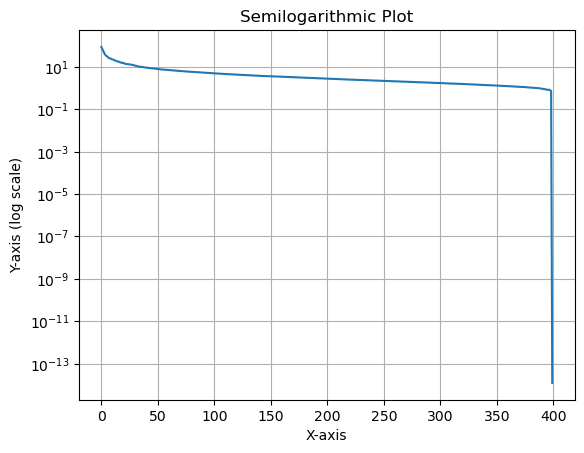

In [25]:
#y = np.log(S)
plt.semilogy(S)

# Add labels and a title
plt.xlabel('X-axis')
plt.ylabel('Y-axis (log scale)')
plt.title('Semilogarithmic Plot')

# Show the plot
plt.grid(True)  # Add a grid for better visualization
plt.show()

Here we display the eigen-faces derived from the SVD Decomposition

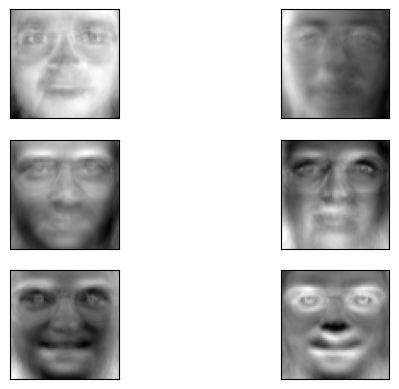

In [26]:
# plot the first dozen images from the data set
plt.figure()
for i in range(6):
    plt.subplot(3, 2, i+1, xticks=[], yticks=[])
    image = U[:, i].reshape((64,64))
    plt.imshow(image, cmap='gray')

Here we create a truncate function

In [27]:
def truncate(k,U,S,V): #returns truncated svd matrices
    return U[:,:k],S[:k],V[:k,:]


We truncate our U,S,V

In [31]:
print(U.shape,":",S.shape,":",V.shape)
Uk,Sk,Vk = truncate(50,U,S,V)
print(Uk.shape,":",Sk.shape,":",Vk.shape) # display truncated

(4096, 400) : (400,) : (400, 400)
(4096, 50) : (50,) : (50, 400)


Now we calculate the RMS for our derivation

$RMS = \sqrt{\frac{1}{N} \sum_{i=1}^{N} (x_i - \hat{x})^2}$

In [44]:
Ak=Uk@np.diag(Sk)@Vk
difference = (A-Ak)**2
RMS = np.sqrt((np.sum(difference))/(A.shape[0]*A.shape[1]))
print(RMS)

0.04930985580352994


Here we display some orignial images against our reconstructions. As you can see, the images lose some quality but retain a lot of the latent information. It is remarkable we reduced the dimension to 50 and were able to achieve this

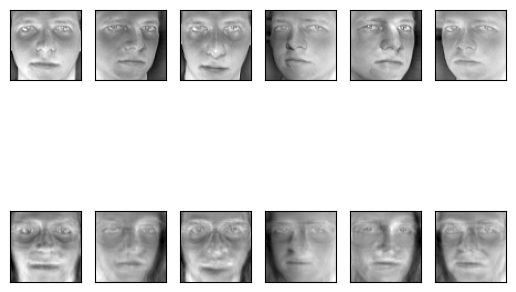

In [60]:
for i in range(6):
    plt.subplot(2, 6, i+1, xticks=[], yticks=[])
    image = A[:, i].reshape((64,64))
    plt.imshow(image, cmap='gray')
    
for i in range(6):
    plt.subplot(2, 6, 7+i, xticks=[], yticks=[])
    image = Ak[:, i].reshape((64,64))
    plt.imshow(image, cmap='gray')